In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import quandl
%matplotlib inline 

quandl.ApiConfig.api_key = "gFgzypBFboDs4LdBHysy"

In [18]:
start = '2013-06-01'
end = '2016-12-31'
m='PG'

In [24]:
data = quandl.get("EOD/PG", authtoken="gFgzypBFboDs4LdBHysy",start_date = start,end_date = end)

In [20]:
data['mu'] = [data['Adj_Close'][:i].mean() for i in range(len(data))]
data.tail()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,mu
Date,,,,,,,,,,,,,
2016-12-23,84.6800,85.18,84.550,84.96,5283719.0,0.0,1.0,75.255148,75.699499,75.139617,75.503985,5283719.0,69.010685
2016-12-27,84.8984,84.94,84.420,84.60,3782537.0,0.0,1.0,75.449241,75.486211,75.024086,75.184052,3782537.0,69.018452
2016-12-28,84.4000,84.63,83.945,84.07,4298812.0,0.0,1.0,75.006312,75.210713,74.601954,74.713041,4298812.0,69.025819
2016-12-29,84.2400,84.49,84.100,84.35,3718306.0,0.0,1.0,74.864120,75.086295,74.739702,74.961877,3718306.0,69.032605
2016-12-30,84.1700,84.45,83.920,84.08,6209846.0,0.0,1.0,74.801911,75.050747,74.579736,74.721928,6209846.0,69.039672


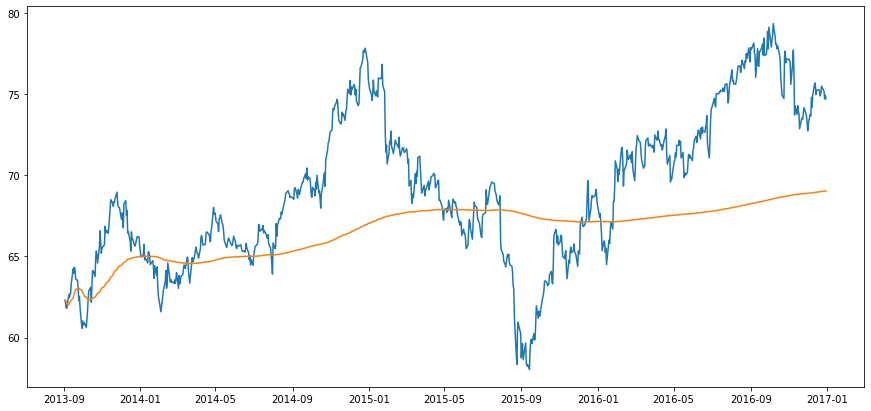

In [21]:
plt.figure(figsize=(15,7))
plt.plot(data['Adj_Close'])
plt.plot(data['mu']);
plt.show()

In [22]:
# Compute the z-scores for each day using the historical data up to that day
zscores = [(data['Adj_Close'][i] - data['mu'][i]) / np.std(data['Adj_Close'][:i]) for i in range(len(data))]

# Start with no money and no positions
money = 0
count = 0
for i in range(len(data)):
    # Sell short if the z-score is > 1
    if zscores[i] > 1:
        money += data['Adj_Close'][i]
        count -= 1
    # Buy long if the z-score is < 1
    elif zscores[i] < -1:
        money -= data['Adj_Close'][i]
        count += 1
    # Clear positions if the z-score between -.5 and .5
    elif abs(zscores[i]) < 0.5:
        money += count*data['Adj_Close'][i]
        count = 0
print (money)

14564.096858577635


<ipython-input-22-6ece2a7ecf6f>:2: RuntimeWarning: divide by zero encountered in double_scalars
  zscores = [(data['Adj_Close'][i] - data['mu'][i]) / np.std(data['Adj_Close'][:i]) for i in range(len(data))]
